<div style="text-align:center; background-color:lightblue; color:black; font-size:40px; font-family:serif;">
    EDA ON MSDHONI ODI FORMAT 
</div>

<div style=" background-color:lightblue; color:black; font-size:25px; font-family:serif;">
    🎯Goal
</div>

* ### Using the EDA libraries to know  MSDhoni ODI Batting Performance
* ### By using EDA Library
     > * OpenCV (Open Source Computer Vision Library) for image 
     > * Numpy and Pandas  libraries 
     > * Seaborn , Matplot  libraries 

 ## By using the opencv,numoy,matplot library 

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
bgr_img = cv2.imread("174662.jpg")
plt.imshow(bgr_img)

here image is read by using open_cv functions 
 < cvtcolor - it is used to convert the

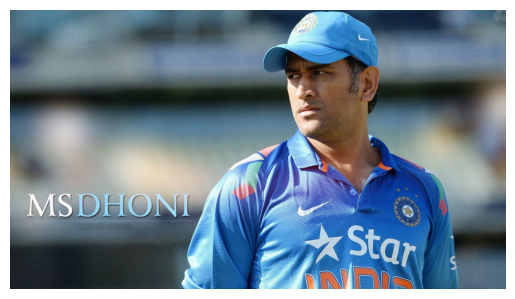

In [5]:
msd_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
plt.imshow(msd_img)
plt.axis('off')
plt.show()

<div style="text-align:center; background-color:orange; color:black; font-size:40px; font-family:serif;">
    MS DHONI 
</div>

<div style="text-align:center; background-color:lightblue; color:black; font-size:30px; font-family:serif;">
      Data Inspection
</div>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [7]:
msd = pd.read_csv('MSDhoni_ODI_Stats.csv')
msd.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,0,1,1,0,0,0.00,7,run out,1,v Bangladesh,Chattogram,23 Dec 2004
1,12,16,11,2,0,109.09,7,caught,2,v Bangladesh,Dhaka,26 Dec 2004
2,7*,2,2,0,1,350.00,7,not out,1,v Bangladesh,Dhaka,27 Dec 2004
3,3,8,7,0,0,42.85,7,caught,1,v Pakistan,Kochi,2 Apr 2005
4,148,155,123,15,4,120.32,3,caught,1,v Pakistan,Visakhapatnam,5 Apr 2005


* The first few rows of a DataFrame. By default, it shows the first 5 rows. If you give any numeric in function it shows first no.of.rows for datasets
* These functions are commonly used for exploratory data analysis (EDA) and data inspection. 

In [8]:
msd.tail()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
345,56*,99,61,3,2,91.80,6,not out,1,v West Indies,Manchester,27 Jun 2019
346,42*,54,31,4,1,135.48,6,not out,2,v England,Birmingham,30 Jun 2019
347,35,52,33,4,0,106.06,6,caught,1,v Bangladesh,Birmingham,2 Jul 2019
348,DNB,-,-,-,-,-,-,-,2,v Sri Lanka,Leeds,6 Jul 2019
349,50,114,72,1,1,69.44,7,run out,2,v New Zealand,Manchester,9 Jul 2019


* The last few rows of a DataFrame. By default, it shows the last 5 rows. If you give any numeric in function it shows last no.of.rows for datasets 

In [9]:
msd.dtypes

Runs          object
Mins          object
BF            object
4s            object
6s            object
SR            object
Pos           object
Dismissal     object
Inns          object
Opposition    object
Ground        object
Start Date    object
dtype: object

In [10]:
msd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Runs        350 non-null    object
 1   Mins        350 non-null    object
 2   BF          350 non-null    object
 3   4s          350 non-null    object
 4   6s          350 non-null    object
 5   SR          350 non-null    object
 6   Pos         350 non-null    object
 7   Dismissal   350 non-null    object
 8   Inns        350 non-null    object
 9   Opposition  350 non-null    object
 10  Ground      350 non-null    object
 11  Start Date  350 non-null    object
dtypes: object(12)
memory usage: 32.9+ KB


* it will display a summary of the DataFrame dframe

In [11]:
msd.shape

(350, 12)


<div style="text-align:center; background-color:lightblue; color:black; font-size:30px; font-family:serif;">
      Data Preprocessing
</div>

In [12]:
msd = msd.replace('-', 0)
msd = msd.replace(['DNB'], 0)

In [13]:
msd['4s'] = msd['4s'].astype(int).fillna(0)

In [14]:
msd['6s'] = msd['6s'].astype(int).fillna(0)

In [15]:
msd['Pos'] = msd['Pos'].astype(int).fillna(0)

In [16]:
msd['SR'] = msd['SR'].astype(float).fillna(0)

In [17]:
msd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Runs        350 non-null    object 
 1   Mins        350 non-null    object 
 2   BF          350 non-null    object 
 3   4s          350 non-null    int64  
 4   6s          350 non-null    int64  
 5   SR          350 non-null    float64
 6   Pos         350 non-null    int64  
 7   Dismissal   350 non-null    object 
 8   Inns        350 non-null    object 
 9   Opposition  350 non-null    object 
 10  Ground      350 non-null    object 
 11  Start Date  350 non-null    object 
dtypes: float64(1), int64(3), object(8)
memory usage: 32.9+ KB


In [18]:
msd.describe()

,4s,6s,SR,Pos
count,350.000000,350.000000,350.000000,350.000000
mean,2.360000,0.654286,74.623343,4.637143
std,2.778674,1.222015,53.931300,2.195931
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,42.850000,4.000000
50%,2.000000,0.000000,73.955000,5.000000
75%,3.000000,1.000000,104.215000,6.000000
max,15.000000,10.000000,400.000000,8.000000


In [38]:
msd.columns

Index(['Runs', 'Mins', 'BF', '4s', '6s', 'SR', 'Pos', 'Dismissal', 'Inns',
       'Opposition', 'Ground', 'Start Date'],
      dtype='object')

In [40]:
msd.drop(['Start Date'],axis=1,inplace=True)

In [41]:
msd.columns

Index(['Runs', 'Mins', 'BF', '4s', '6s', 'SR', 'Pos', 'Dismissal', 'Inns',
       'Opposition', 'Ground'],
      dtype='object')

<div style="text-align:center; background-color:lightblue; color:black; font-size:30px; font-family:serif;">
     DATA VISUALASATION
</div>

In [35]:
msd_50s = msd.loc[msd.Runs == "50"]
msd_50s

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
83,50,98,72,4,1,69.44,7,caught,1,v England,Lord's,8 Sep 2007
124,50,87,61,5,0,81.96,4,lbw,2,v England,Cuttack,26 Nov 2008
240,50,79,60,2,3,83.33,6,caught,2,v New Zealand,Auckland,25 Jan 2014
349,50,114,72,1,1,69.44,7,run out,2,v New Zealand,Manchester,9 Jul 2019


In [37]:
msd_100s = msd.loc[msd.Runs == "100"]
msd_100s

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date


## Using numpy fun() we can know the basic outline of the MSDHONI

In [20]:
mean_4s = np.mean(msd['4s'])
print(mean_4s)

2.36


* The avg 4s hitted by  MSDHONI Bat

In [21]:
mean_6s = np.mean(msd['6s'])
print(mean_6s)

0.6542857142857142


* The avg 6s hitted by  MSDHONI Bat

In [22]:
mean_SR = np.mean(msd['SR'])
print(mean_SR)

74.62334285714286


* The avg strike rate of  MSDHONI 

# Exploratory Data Analysis (EDA) of MSD's Honi Batting Performance

### Let's dive deeper into the batting performance of MSD (MS Dhoni) using various EDA libraries.


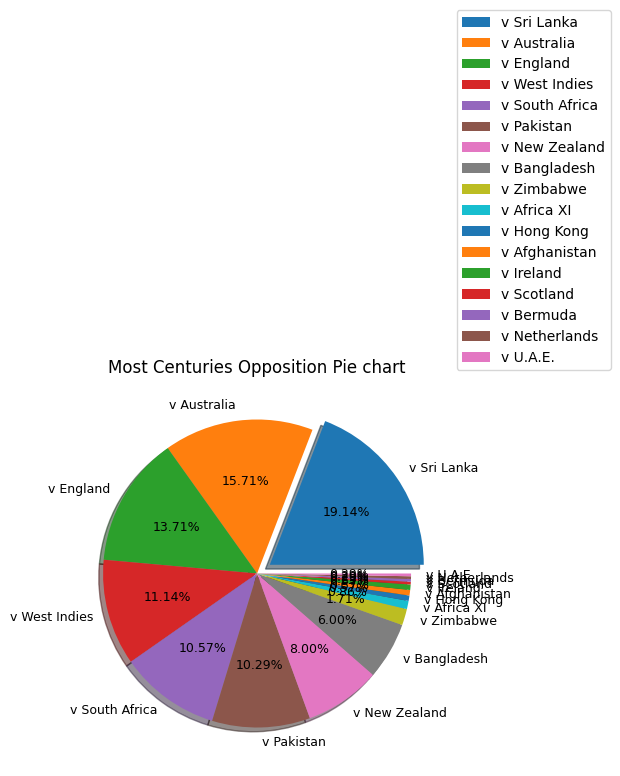

In [23]:
label = msd['Opposition'].value_counts()
plt.figure(figsize = (10,5))
explode = [0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',]
plt.pie(label, labels=label.index, autopct='%1.2f%%', textprops={'fontsize':9},shadow =True, explode=explode, colors=colors)
plt.title('Most Centuries Opposition Pie chart')
plt.legend(bbox_to_anchor=[1,1.01])
plt.show()

<div style=" background-color:darkgreen; color:black; font-size:30px; font-family:serif;">
    Data visualasation of Opposition for the MSD ODI dataset  in pie chart 
</div>

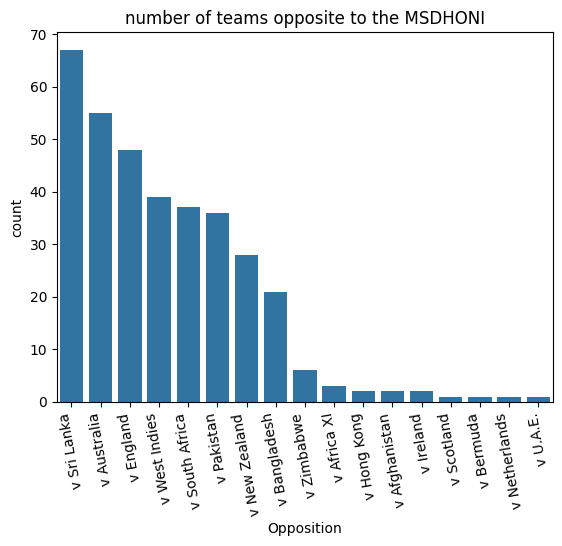

In [24]:
sns.countplot(data=msd,x="Opposition",order=msd["Opposition"].value_counts().index)
plt.xticks(rotation=100)
plt.title('number of teams opposite to the MSDHONI')
plt.show()

<div style=" background-color:darkred; color:white; font-size:30px; font-family:serif;">
    Data visualasation of Opposition for the  MSD ODI dataset in Bar graph 
</div>

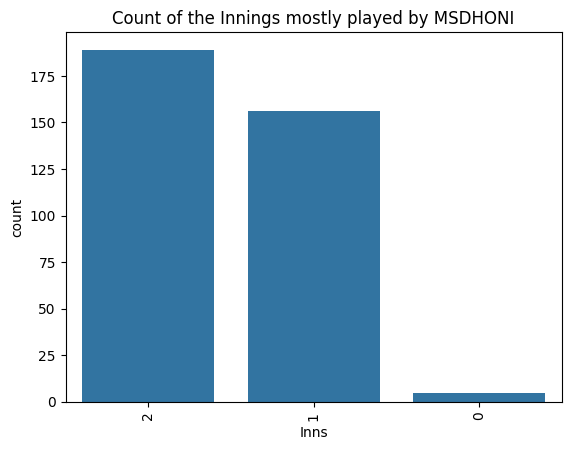

In [25]:
sns.countplot(data=msd,x="Inns",order=msd["Inns"].value_counts().index)
plt.xticks(rotation=90)
plt.title('Count of the Innings mostly played by MSDHONI')
plt.show();

<div style=" background-color:blue; color:white; font-size:30px; font-family:serif;">
    Data visualasation of Innings for the  MSD ODI dataset in Bar graph 
</div>

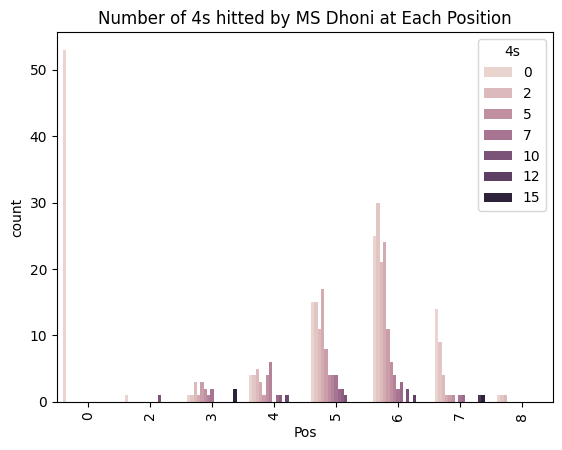

In [26]:
sns.countplot(data=msd,x="Pos",hue="4s")
plt.xticks(rotation=90)
plt.title('Number of 4s hitted by MS Dhoni at Each Position')
plt.show();

<div style=" background-color:pink; color:black; font-size:30px; font-family:serif;">
    Data visualasation of variable 4s and variable Pos (position of batting)  for the  MSD ODI dataset in Bar graph 
</div>

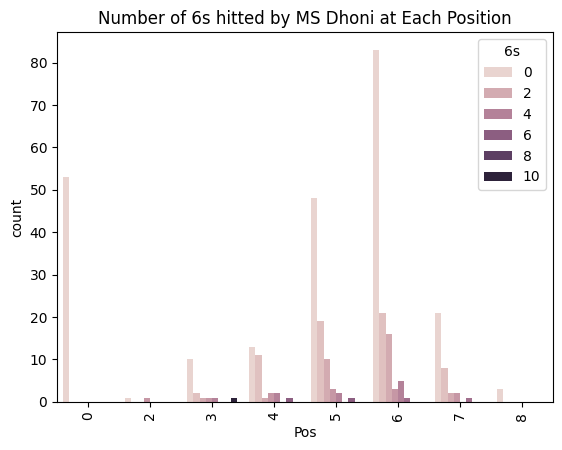

In [27]:
sns.countplot(data=msd,x="Pos",hue="6s")
plt.xticks(rotation=90)
plt.title('Number of 6s hitted by MS Dhoni at Each Position')
plt.show();

<div style=" background-color:pink; color:black; font-size:30px; font-family:serif;">
    Data visualasation of variable 6s and variable Pos (position of batting)  for the  MSD ODI dataset in Bar graph 
</div>

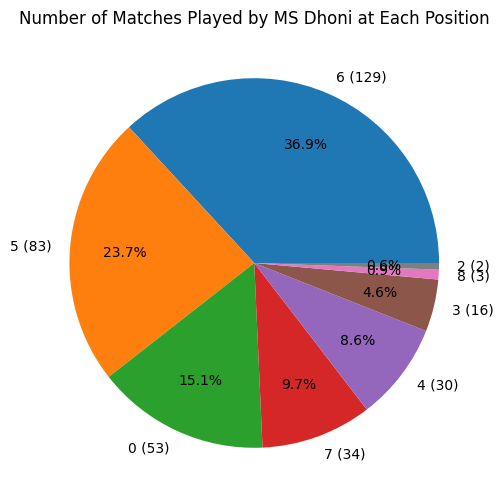

In [28]:

matches_count = msd['Pos'].value_counts().reset_index()
matches_count.columns = ['Pos', 'Matches']

plt.figure(figsize=(8,6))
plt.pie(matches_count['Matches'], labels=[f"{pos} ({count})" for pos, count in zip(matches_count['Pos'], matches_count['Matches'])], 
        autopct='%1.1f%%', pctdistance=0.7, labeldistance=1.1)
plt.title('Number of Matches Played by MS Dhoni at Each Position')
plt.show()

<div style=" background-color:orange; color:black; font-size:30px; font-family:serif;">
    Number of Matches Played by MS Dhoni at Each Position 
</div>

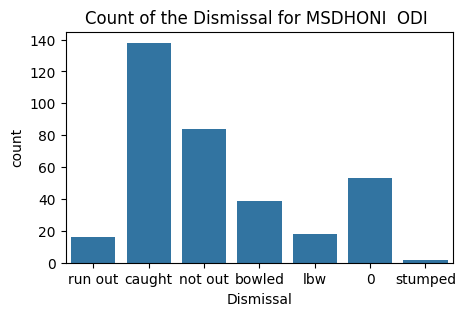

In [29]:
plt.figure(figsize=(5,3))
sns.countplot(x='Dismissal', data=msd)
plt.title('Count of the Dismissal for MSDHONI  ODI ')
plt.show();

<div style=" background-color:yellow; color:black; font-size:30px; font-family:serif;">
    Count of the Dismissal for MSDHONI  ODI 
</div>

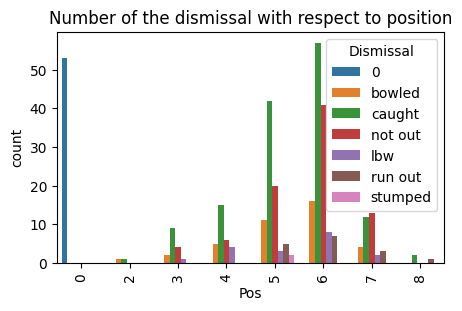

In [30]:
plt.figure(figsize=(5,3))
sns.countplot(data=msd,x="Pos",hue="Dismissal")
plt.xticks(rotation=90)
plt.title('Number of the dismissal with respect to position')
plt.show();

<div style=" background-color:darkgreen; color:black; font-size:30px; font-family:serif;">
    Number of the dismissal with respect to position 
</div>

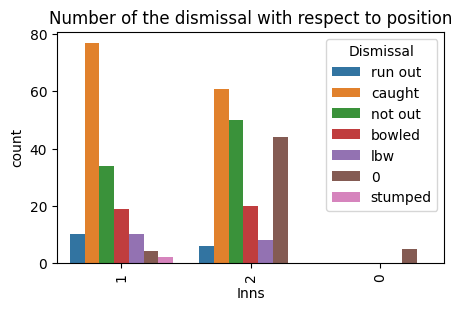

In [31]:
plt.figure(figsize=(5,3))
sns.countplot(data=msd,x="Inns",hue="Dismissal")
plt.xticks(rotation=90)
plt.title('Number of the dismissal with respect to position')
plt.show();

<div style=" background-color:blue; color:black; font-size:30px; font-family:serif;">
    Number of the dismissal with respect to position
</div>

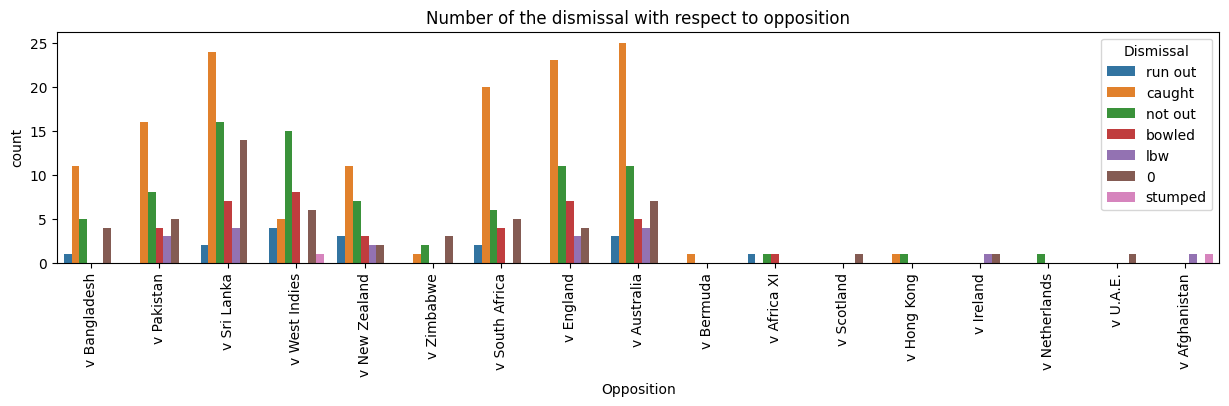

In [32]:
plt.figure(figsize=(15,3))
sns.countplot(data=msd,x="Opposition",hue="Dismissal")
plt.xticks(rotation=90)
plt.title('Number of the dismissal with respect to opposition')
plt.show();

<div style=" background-color:violet; color:black; font-size:30px; font-family:serif;">
    Number of the dismissal with respect to Opposition
</div>

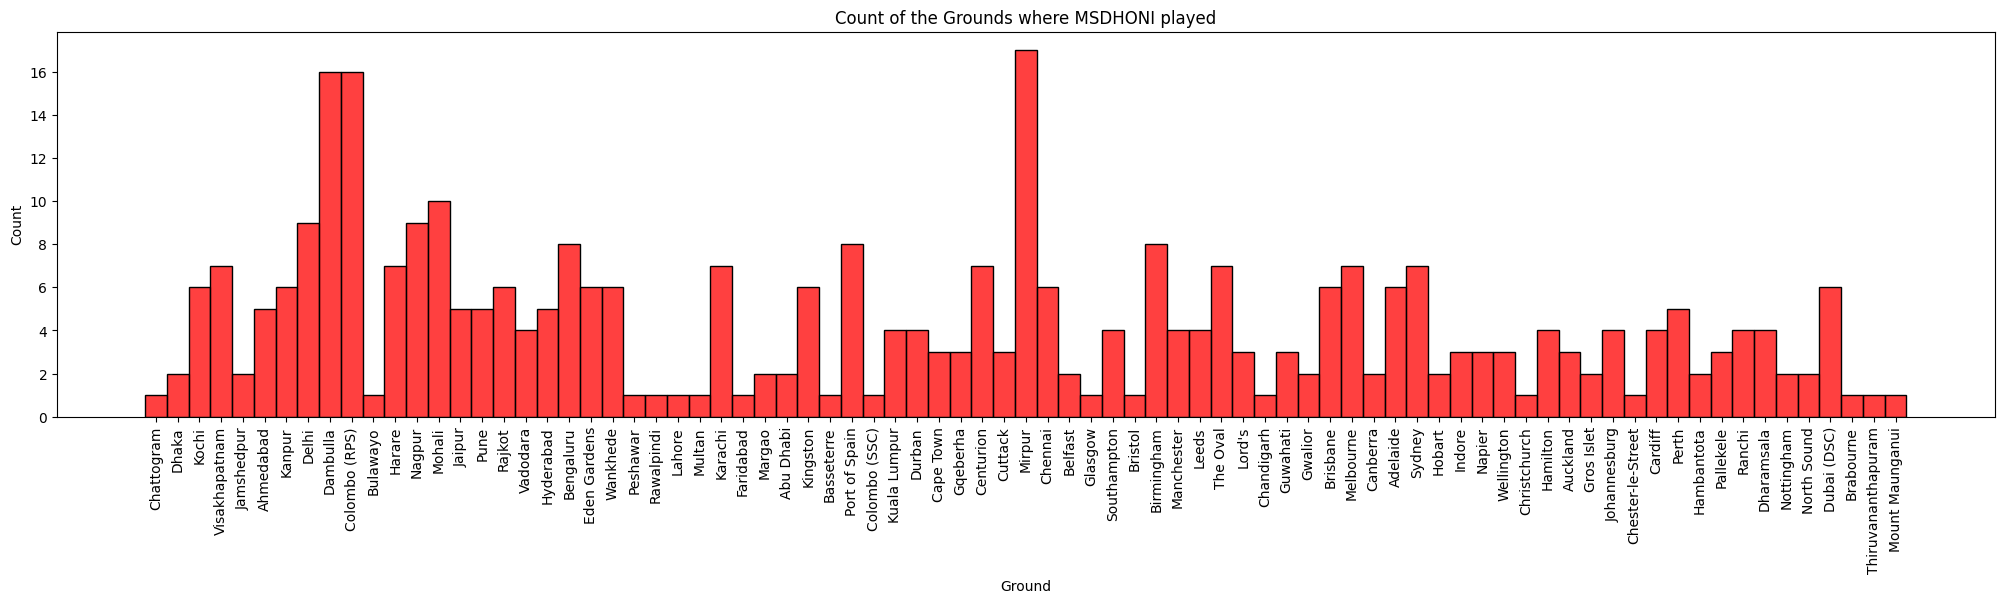

In [33]:
plt.figure(figsize=(25,5))
sns.histplot(x="Ground", data=msd, color="red")
plt.xticks(rotation=90)
plt.title('Count of the Grounds where MSDHONI played')
plt.show();

<div style=" background-color:blue; color:black; font-size:30px; font-family:serif;">
    Count of the Grounds where MSDHONI played
</div>

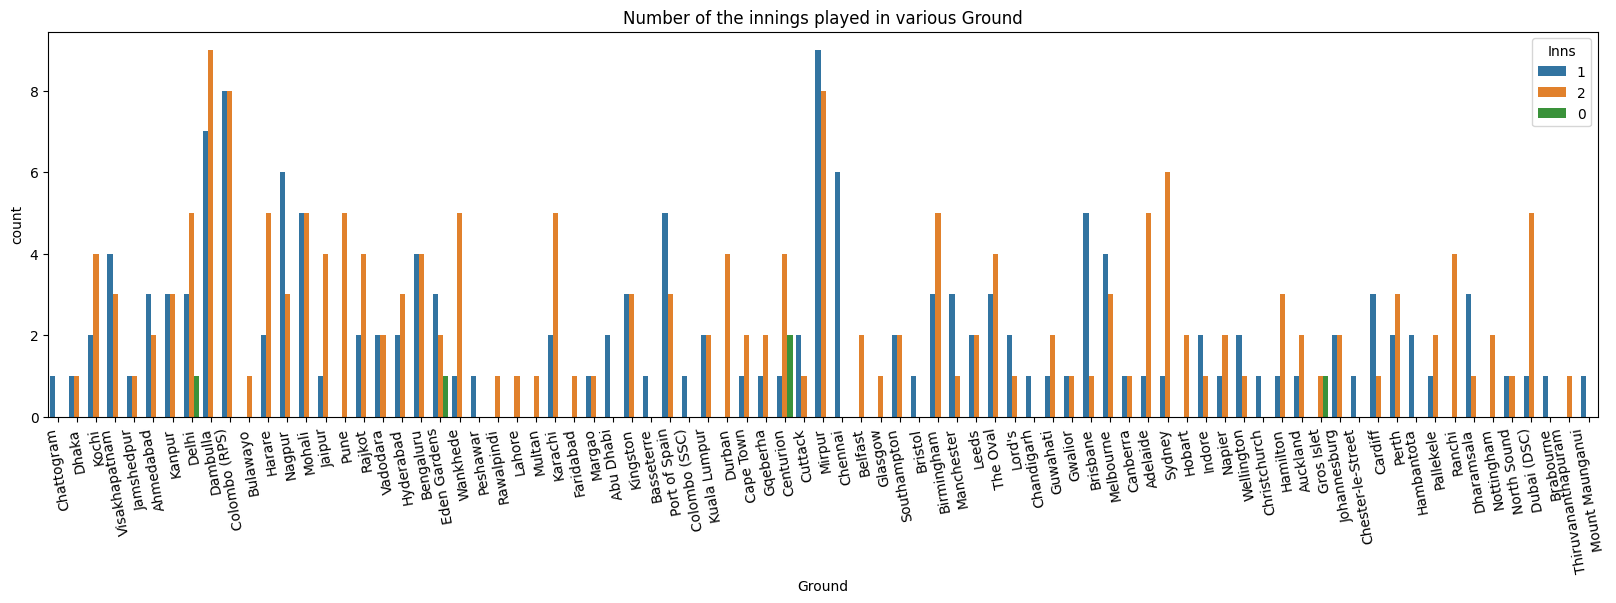

In [34]:
plt.figure(figsize=(20,5))
sns.countplot(data=msd,x="Ground",hue="Inns")
plt.xticks(rotation=100)
plt.title('Number of the innings played in various Ground')
plt.show()

<div style=" background-color:green; color:black; font-size:30px; font-family:serif;">
    Number of the innings played in various Ground
</div>

<div style=" background-color:lightblue; color:black; font-size:30px; font-family:serif;">
    Disadvantages
</div>

* We cannot read the column Runs because  the dtype is string either but we cannot convert it int also runs = 123* ,50*

<div style=" background-color:lightblue; color:black; font-size:30px; font-family:serif;">
    Summary
</div>

> * We did the EDA process on the MSDHONI ODI DATASET
> * we understand the data and there relationship between them
> * we clean and transform data and replace the null in the data
> * we did Outlier Detection of the MSDHONI ODI dataset by using drop the column

<div style="text-align:center; background-color:lightblue; color:black; font-size:50px">
    THANK YOU 
</div>
